# **02. barplot(막대그래프) 실습**
* 문법 관련 공식 문서 : https://seaborn.pydata.org/generated/seaborn.barplot.html

## **PART1. 각종 세팅**

In [1]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)


작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [3]:
# 데이터 로드 및 정보 / 요약통계량 확인
df = pd.read_csv(path + r'\janamt_by_grade.csv', encoding = 'cp949')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연도           21233 non-null  object
 1   고객번호         21233 non-null  int64 
 2   개인법인사업자구분명   21233 non-null  object
 3   보증잔액         21233 non-null  int64 
 4   통합통계거래상대처은행  21233 non-null  object
 5   신용등급         21233 non-null  object
dtypes: int64(2), object(4)
memory usage: 995.4+ KB


,고객번호,보증잔액
count,21233.00,21233.00
mean,55012266.55,176694372.37
std,25921700.45,296667357.52
min,10022592.00,600000.00
25%,32555869.00,50000000.00
50%,55111954.00,100000000.00
75%,77487097.00,205600000.00
max,99992437.00,10000000000.00


In [4]:
# 상위 5개 관측치 확인
df.head(5)

,연도,고객번호,개인법인사업자구분명,보증잔액,통합통계거래상대처은행,신용등급
0,2018-12-31,47580842,개인사업자,40000000,중소기업은행,KR10
1,2018-12-31,62820638,개인사업자,72000000,농업협동조합,KR11
2,2018-12-31,46775714,법인사업자,29580000,우리은행,KR14
3,2018-12-31,19831749,개인사업자,50000000,신한은행,KR08
4,2018-12-31,33966188,개인사업자,30000000,대구은행,KR14


## **PART3. 데이터 집계** - 연도별 보증잔액 추이

In [5]:
df_agg = pd.pivot_table(data = df, index = '연도', aggfunc = {'보증잔액' : 'sum'})
df_agg['보증잔액']  = df_agg['보증잔액'] / 100000000
df_agg

,보증잔액
연도,
2018-12-31,6538.27
2019-12-31,6730.54
2020-12-31,7760.40
2021-12-31,8194.23
2022-12-31,8294.08


## **PART4. 그래프 생성**

In [7]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

Text(0.0, 1.0, '연도별 보증잔액 (단위 : 억원)')

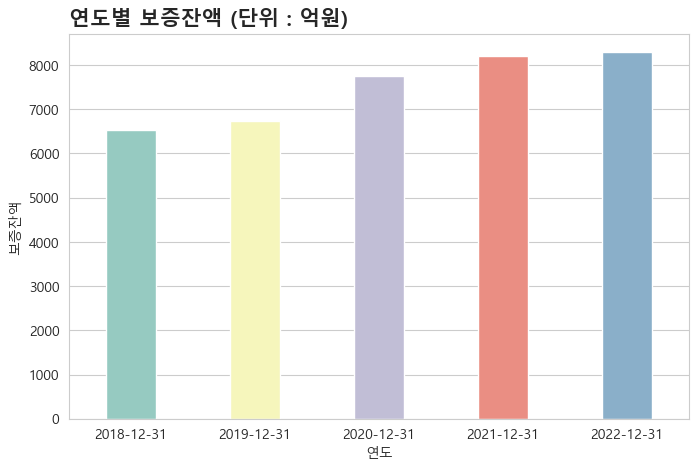

In [10]:
# 도화지 / 좌표계 / 그래프 객체 생성
fig = plt.figure(figsize = [8, 5])
plot = sns.barplot(data = df_agg, x = '연도', y = '보증잔액', hue = '연도', palette='Set3', width = 0.4)
plt.title("연도별 보증잔액 (단위 : 억원)", fontweight = "bold", fontsize = 15, loc = 'left')

## **PART5. 데이터 집계** - 코로나19 전후 신용등급별 보증잔액 추이

In [11]:
df_agg = pd.pivot_table(data = df, index = ['신용등급', '연도'], values = '보증잔액', aggfunc = 'sum').reset_index(drop = False)
df_agg.sort_values(by = ['신용등급', '연도'], inplace = True)
df_agg['보증잔액'] = df_agg['보증잔액'] / 100000000
df_agg

,신용등급,연도,보증잔액
0,KR01,2018-12-31,9.45
1,KR01,2019-12-31,0.41
2,KR01,2020-12-31,2.60
3,KR01,2021-12-31,5.82
4,KR01,2022-12-31,2.75
...,...,...,...
75,기타,2018-12-31,5.00
76,기타,2019-12-31,3.16
77,기타,2020-12-31,2.36
78,기타,2021-12-31,1.93


## **PART6. 그래프 생성**

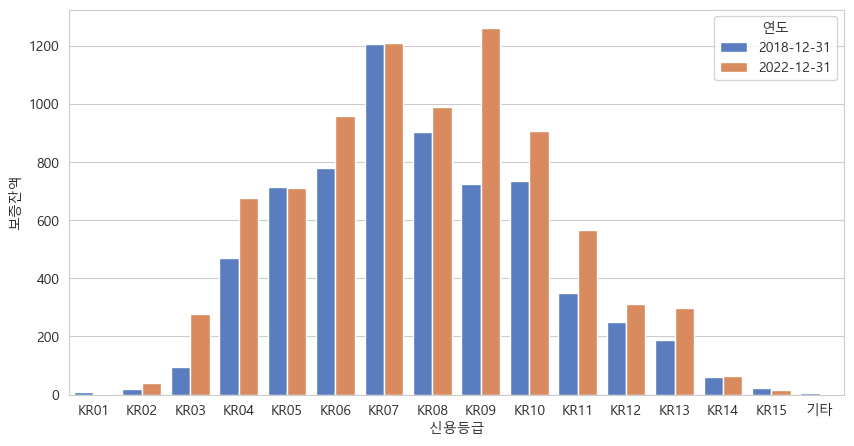

In [12]:
fig = plt.figure(figsize = [10, 5])
sns.barplot(data = df_agg[df_agg['연도'].isin(['2018-12-31', '2022-12-31'])], 
            x = '신용등급', y = '보증잔액', hue = '연도', palette='muted')
plt.show()